Import necessary modules to gain access to spotify API.

If you would like to register for a developer account for spotify API to perform similar tasks, please visit https://developer.spotify.com/documentation/general/guides/app-settings/#register-your-app

In [5]:
import spotipy
import json
import sys
import os
import spotipy.util as util
from PyLyrics import *

In [6]:
#Initialize spotify object
spotify = spotipy.Spotify()

In [ ]:
token = util.prompt_for_user_token(username,client_id,client_secret,redirect_uri)

Create token based user and application information.

In [9]:
client = spotipy.client.Spotify(auth=None, requests_session=True, client_credentials_manager=None, proxies=None, requests_timeout=None)

Create a spotify ojbejct to use your token here.

In [10]:
spotifyObject = spotipy.Spotify(auth=token)

## Get track and audio information

In [11]:
def get_lyrics_audio(lst):
    """This loop gathers tracks, lyrics, and audio features for any given artist
    that we search through the spotify API.  This loops through an artist's last three albums,
    the tracks of those albums, and also retrieves lyrics and audio features from each track.  
    Two lists are returned, one contains a dictionary for each artist with all their track names
    and lyrics.  The second list contains audio features for every track in this loop."""
    
    # Initialize both lists
    tracks_list = []
    lyrics_list= []
    
    # Loop through artists from list we gave
    for artist in lst:
        
        # Initialize dictionary for each unique artist
        artist_dict=  {}

        try:
            # Search artist name in spotify API search
            searchResults = spotifyObject.search(artist,1,0,'artist')
            
            # Get info for first artist in search
            artist = searchResults['artists']['items'][0]

        except Exception as e:
            print(e)
            return False
        
        # Put artist name and number of followers in dict
        artist_dict['Artist'] = artist['name']
        artist_dict['Followers'] = (artist['followers']['total'])
        
        # This artist ID is used to get album results below.
        artistID = artist['id']

        #Extract Album results
        albumResults = spotifyObject.artist_albums(artistID)
        albumResults = albumResults['items']
        
        # Loop through artist's three latest albums
        for item in albumResults[:3]:
            
            # Album ID is used to get track results in each album
            albumID = item['id']

            #Extract track data 
            trackResults = spotifyObject.album_tracks(albumID)
            trackResults = trackResults['items']
            
            # Loop through all tracks 
            for track in trackResults:
                
                # Intialize dictionary for each track
                track_dict = {}

                try:
                    
                    # Track ID used to get audio features
                    trackID = track['id']
                    
                    # Get name of each track
                    name = track['name']
                    
                    # Use python's PyLyrics library retrieve lyrics for each song found.
                    # If lyrics for a song are not available in library, skip the song.
                    lyrics = PyLyrics.getLyrics(artist['name'],name)
                    lyrics = lyrics.replace('\n', ' ')
                    
                    # Add artist name for each track in track dict
                    track_dict['Artist'] = artist['name']
                    
                    # Add song name for each track
                    track_dict['song'] = name

                    track_dict['id']= trackID
                    
                    # Use track ID to get audio features for each track.
                    # Key will be the word audio, and value will be all the audio features
                    track_dict['audio']= spotifyObject.audio_features(tracks=trackID)
                    
                    # For artist dict, each track name is a key, and the value is lyrics for the song.
                    artist_dict[name] = lyrics
                    
                    # Only add track to tracks dictionary if the track name is already in the artist dictionary.
                    # We only want tracks that will be in both dictionaries, for ease of analysis.
                    if name in artist_dict.keys():
                        
                        # Append each track dictionary to list of track dicts
                        tracks_list.append(track_dict)

                except:
                    pass
                 
        try:
            
            # Append dictionary for each artist to list of artist dicts
            lyrics_list.append(artist_dict)
            
        except:
            pass
    
    # Return list of artist dicts and list of track dicts
    return lyrics_list,tracks_list

The function above was applied for all four genres that were included in this project.  The only argument that is necessary for input is a list of artists, so for each genre this function will loop through the given list. 

### Here is an example.

To show how exactly what this function returns, we will input a list of a few music artists.

In [12]:
ex_list = ['Eminem','Drake','Ariana Grande']

In [13]:
# Input example list into the functio (Returns 2 lists)
lyrics_list,audio_list = get_lyrics_audio(ex_list)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Let's see what these lists look like 

In [14]:
len(lyrics_list)

3

Lyrics_list consists of 3 seperate dictionaries.  For each artist dictionary, it contains keys of song names, and the corresponding lyrics to that song as values.  The values are very lengthy since they are full song lyrics.  Also, one key should be 'artist', with the artist name as the value.  

In [16]:
lyrics_list[0]['Artist']

'Eminem'

Next, we'll take a peek at the audio list.

In [17]:
len(audio_list)

150

The length of the list is 150, which equates to about 50 songs per artist.  This makes sense because we looped through tracks for the artist's last three albums (16.5 songs per album).

Each item should be a dictionary, with specific audio features for a single song.  We can check out the first 5 items of the list.

In [18]:
audio_list[:5]

[{'Artist': 'Eminem',
  'audio': [{'acousticness': 0.0311,
    'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2jt2WxXMCD4zjACthkJQVE',
    'danceability': 0.939,
    'duration_ms': 337941,
    'energy': 0.551,
    'id': '2jt2WxXMCD4zjACthkJQVE',
    'instrumentalness': 0,
    'key': 1,
    'liveness': 0.192,
    'loudness': -9.126,
    'mode': 1,
    'speechiness': 0.291,
    'tempo': 118.552,
    'time_signature': 4,
    'track_href': 'https://api.spotify.com/v1/tracks/2jt2WxXMCD4zjACthkJQVE',
    'type': 'audio_features',
    'uri': 'spotify:track:2jt2WxXMCD4zjACthkJQVE',
    'valence': 0.42}],
  'id': '2jt2WxXMCD4zjACthkJQVE',
  'song': 'The Ringer'},
 {'Artist': 'Eminem',
  'audio': [{'acousticness': 0.0441,
    'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2XTquzYQAdT1Hk78bOUwsv',
    'danceability': 0.809,
    'duration_ms': 226938,
    'energy': 0.737,
    'id': '2XTquzYQAdT1Hk78bOUwsv',
    'instrumentalness': 0,
    'key': 1,
    'liveness': 0.341,
   

## Standardizing and Pre-processing lyrics for each genre.

The next steps consisting of cleaning and pre-processing all lyrics for each genre seperately.  To avoid repetition, I will only show the pre-processing for the country genre.

First I will load a previously pickled country lyrics list and country track list, which were constructed using the lengthy function above.

In [19]:
import pickle
with open("country_lyrics.pkl", 'rb') as picklefile: 
    country_lyrics = pickle.load(picklefile)

In [101]:
with open("NEW_countrytracks.pkl", 'rb') as picklefile: 
    country_tracks = pickle.load(picklefile)

In [21]:
len(country_lyrics)

179

In [105]:
len(country_tracks)

4849

There is 4,849 tracks, and 179 artists.  Which comes out to about 27 songs per artist. 

Note: Many songs do not have lyrics available in the library, which explains why it is not closer to 50 songs per artist.

In [23]:
# Make a separate list of just lyrics of all songs without artist names
country_songs = []
for d in country_lyrics:
    for key,val in d.items():
        if key != 'Artist':
            if key != 'Followers':
                country_songs.append(val)

In [24]:
len(country_songs)

4342

In [25]:
len(set(country_songs))

4223

In [26]:
# Remove duplicate song/lyrics using set
country_songs = list(set(country_songs))

In [27]:
country_songs[1]

"Hey I'm just staring out the window, baby don't mind me But it's been a couple weeks since I walked on something but concrete This big city's getting to me, I'm having hillbilly dreams I'm hearing Haggard songs, it's been too long  I'm thinking country, I'm talking hammer down I mean one arm out the window like Smokey and the Bandit Kind of good times, it's what I got on my mind Let's go to Luckenbach, it's what I need I can't help it, I'm just thinking country  Cane pole stuck in the sand That's the kind of mood that I'm in I can't focus on anything else but getting us gone I got this crazy desire to go out and sit by a fire Maybe light up cheap cigars, Willy on guitar  I'm thinking country, I'm talking hammer down I mean one arm out the window like Smokey and the Bandit Kind of good times, it's what I got on my mind Let's go to Luckenbach, it's what I need I can't help it, I'm just thinking country Yeah, I'm thinking country  So just go with me baby, come on, help me concentrate I k

The lyrics list and track list are not the same length, which is a problem, because we want to be able to match songs lyrics and audio features on the same index.  This is a problem that will be addressed later.

Now, we will move forward with pre-processing of lyrics.

### First, we will convert all these words to a count vectorizer.  Which will give us a sparse matrix of the counts for each word.

In [28]:
# Import Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer 

In [30]:
# Import stop words.  Consists of common words in dictionary that won't provide much meaning
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

In [32]:
# Intialize count vectorizer. N-grams are pairs and triplets of words
vectorizer = CountVectorizer(min_df = 10, stop_words = stop_words, ngram_range=[1, 3])

In [33]:
#Fit the model on the list of lyrics
dtm = vectorizer.fit_transform(country_songs)

### The topic modeling library named Gensim will ease the process of pre-processing and lemmatizing our features.  To learn more about the library, check out this link below.

https://radimrehurek.com/gensim/

In [34]:
#Gensim material
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [35]:
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [36]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

In [37]:
# Sentence to individual words function
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [38]:
country_words = list(sent_to_words(country_songs))

This function allowed us to convert all of the sentences in our corpus to words.  This is what the first index looks like.

In [41]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(country_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[country_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


We can define some more functions to clean and lemmatize the words in the corpus.

In [44]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [45]:
# Remove Stop Words
words_nostops = remove_stopwords(country_words)

# Form Bigrams
words_bigrams = make_bigrams(words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [46]:
# Establish index to word in dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus of clean texts
country_texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in country_texts]

To get a general view of the main topics surrounding all the country lyrics, we can now perform LDA topic modeling.

## LDA Topic Modeling

In [47]:
# This will give us the top 15 topics out of all the country lyrics
country_lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [48]:
from pprint import pprint
pprint(country_lda.print_topics())
doc_lda = country_lda[corpus]

[(0,
  '0.380*"wanna" + 0.023*"don" + 0.017*"business" + 0.013*"end" + 0.012*"drug" '
  '+ 0.011*"rose" + 0.011*"married" + 0.011*"standin" + 0.011*"heartbeat" + '
  '0.008*"sleepin"'),
 (1,
  '0.174*"come" + 0.042*"party" + 0.040*"dance" + 0.031*"round" + 0.017*"tie" '
  '+ 0.017*"pour" + 0.016*"rain" + 0.016*"bone" + 0.014*"jack" + 0.013*"dead"'),
 (2,
  '0.160*"bad" + 0.026*"family" + 0.026*"burn" + 0.025*"choose" + '
  '0.023*"sorry" + 0.019*"case" + 0.017*"heartache" + 0.017*"runway" + '
  '0.017*"insane" + 0.013*"whisky"'),
 (3,
  '0.053*"get" + 0.046*"go" + 0.037*"night" + 0.035*"ain" + 0.029*"girl" + '
  '0.019*"tonight" + 0.018*"light" + 0.017*"right" + 0.016*"song" + '
  '0.014*"long"'),
 (4,
  '0.071*"blue" + 0.057*"country" + 0.029*"sugar" + 0.027*"texas" + '
  '0.023*"red" + 0.022*"white" + 0.021*"drinkin" + 0.020*"hot" + 0.018*"city" '
  '+ 0.015*"summer"'),
 (5,
  '0.055*"love" + 0.049*"know" + 0.033*"don" + 0.033*"just" + 0.027*"will" + '
  '0.025*"ve" + 0.024*"say" + 0

To check out a nice visual of the topic distribution, we can scroll over these topic bubbles from this notebook that Gensim provides.

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(country_lda, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      33.837199        1       1 -0.311832 -0.129754
3      17.842333        1       2 -0.293805  0.011667
13     12.650715        1       3 -0.279744 -0.049129
7       6.598119        1       4 -0.091879  0.032159
12      4.635636        1       5  0.051453  0.046809
10      4.413179        1       6  0.010377  0.261178
11      4.045977        1       7  0.020620  0.248450
4       2.961436        1       8  0.068516  0.176638
1       2.625079        1       9  0.055538 -0.051535
14      2.091335        1      10  0.144096 -0.061829
9       1.954924        1      11  0.098402 -0.154481
8       1.813477        1      12  0.117570 -0.073825
6       1.710385        1      13  0.137909 -0.080222
0       1.474546        1      14  0.122972 -0.109324
2       1.345660        1      15  0.149807 -0.066801, topic_info=      Category         Freq               Term        Total  loglift  logprob
term                                                                         
53     Default  4274.000000               baby  4274.000000  30.0000  30.0000
10     Default  3990.000000               come  3990.000000  29.0000  29.0000
49     Default  2710.000000               want  2710.000000  28.0000  28.0000
176    Default  2466.000000              wanna  2466.000000  27.0000  27.0000
121    Default  2596.000000              heart  2596.000000  26.0000  26.0000
17     Default  7460.000000                get  7460.000000  25.0000  25.0000
70     Default  4331.000000               good  4331.000000  24.0000  24.0000
132    Default  8222.000000               love  8222.000000  23.0000  23.0000
87     Default  2239.000000               need  2239.000000  22.0000  22.0000
66     Default  5477.000000                don  5477.000000  21.0000  21.0000
81     Default  7379.000000               know  7379.000000  20.0000  20.0000
278    Default  1872.000000                man  1872.000000  19.0000  19.0000
128    Default  2585.000000               life  2585.000000  18.0000  18.0000
0      Default  4770.000000                ain  4770.000000  17.0000  17.0000
19     Default  6854.000000                 go  6854.000000  16.0000  16.0000
79     Default  7742.000000               just  7742.000000  15.0000  15.0000
400    Default  1378.000000              break  1378.000000  14.0000  14.0000
25     Default  3245.000000             little  3245.000000  13.0000  13.0000
200    Default  3200.000000              night  3200.000000  12.0000  12.0000
605    Default   948.000000                bad   948.000000  11.0000  11.0000
44     Default  2962.000000              thing  2962.000000  10.0000  10.0000
169    Default  1611.000000                old  1611.000000   9.0000   9.0000
225    Default  1690.000000               away  1690.000000   8.0000   8.0000
190    Default  2895.000000               girl  2895.000000   7.0000   7.0000
139    Default  4509.000000                say  4509.000000   6.0000   6.0000
97     Default  3788.000000                 ve  3788.000000   5.0000   5.0000
1497   Default   968.000000               ring   968.000000   4.0000   4.0000
22     Default  4292.000000                let  4292.000000   3.0000   3.0000
155    Default   925.000000               blue   925.000000   2.0000   2.0000
222    Default  4194.000000               will  4194.000000   1.0000   1.0000
...        ...          ...                ...          ...      ...      ...
3088   Topic15    75.470007             whisky    76.380986   4.2963  -4.3616
10836  Topic15    59.893350  unstoppable_today    60.804462   4.2932  -4.5927
634    Topic15    58.084493             mexico    58.995445   4.2927  -4.6234
1997   Topic15    57.081529             oughta    57.992483   4.2925  -4.6408
508    Topic15    56.690036              brain    57.600990   4.2923  -4.6477
2912   Topic15    48.839888             excuse    49.750840   4.2898  -4.79

### This provides a good general view, but we need to take this a step further.  Another library named Word2Vec specializes in context modeling.  This can be very useful in this instance, as we can distinguish differences between songs from context and meaning.  

## Word2Vec

Since we already have the lyrics lemmatized, this should be a fairly simple process to go through.

In [52]:
from gensim.models import Word2Vec

In [53]:
w2v_country = Word2Vec(country_texts, size=100, window=5, min_count=1, workers=4, sg=1)

In [54]:
w2v_country

In [56]:
# Test out feature that gives most similar words to an input we give.
w2v_country.most_similar('house')

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('build', 0.7698514461517334),
 ('payment', 0.7373060584068298),
 ('white_picket', 0.7340619564056396),
 ('couch', 0.7254501581192017),
 ('sticks_stone', 0.7128585577011108),
 ('homebody', 0.7047714591026306),
 ('court', 0.7025715112686157),
 ('mansion', 0.7005638480186462),
 ('percent', 0.7004590034484863),
 ('tv', 0.6992987394332886)]

Since we care more about full songs, we can get the feature vector for every word in a song, and combine them to get a final average feature vector.

In [57]:
def avg_feature_vector(sentence, model, num_features):
    
    index2word_set= set(model.wv.index2word)
    
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [58]:
# Initialize a list to store full song_vectors
import numpy as np
country_vecs =[]

# Each sentence will split words and get the full vector
for song in country_songs:
    vector = avg_feature_vector(song, model=w2v_country, num_features=100)
    country_vecs.append(vector)

In [60]:
# Same length as lyrics list
len(country_vecs)

4223

In [61]:
# Feature vector of one full song
country_vecs[0]

array([-0.20616944, -0.19234768,  0.03748675, -0.05559431, -0.21528272,
        0.04511113, -0.08902641,  0.1482497 ,  0.21938287, -0.40819988,
        0.11918472,  0.20369028,  0.17137304,  0.33253282, -0.02734063,
        0.0370605 , -0.35945722, -0.1685685 , -0.1576145 , -0.03167114,
       -0.02597265, -0.19902012,  0.04680165,  0.26944345,  0.0451737 ,
        0.04220282, -0.0771038 ,  0.03675211,  0.04022288,  0.05603847,
        0.04904374, -0.08016553,  0.14742991, -0.14963971, -0.01349499,
       -0.2671885 , -0.04927472,  0.1760329 ,  0.05099062, -0.20296271,
        0.01305126, -0.20145331, -0.0811317 , -0.09281912, -0.13115792,
        0.3586981 ,  0.25990576, -0.18677223, -0.14316542, -0.09478278,
       -0.08747537,  0.02112587,  0.22701195, -0.3606252 ,  0.28612083,
       -0.0607785 ,  0.12128154, -0.00979501,  0.05547552, -0.20449011,
       -0.07937807,  0.16710891,  0.21830833,  0.17080797, -0.01327083,
       -0.05248574,  0.09550147, -0.10488338, -0.08515953,  0.13

In [63]:
# Each song is a 100 dimensional vector
country_vecs[1].shape

(100,)

### We have full feature vectors for each song! Now we can use a Nearest Neighbors technique to calculate the shortest cosine distance between songs, and the closest songs to a song we input can be considered a playlist.

## Nearest Neighbors (cosine distance)

In [64]:
from sklearn.neighbors import NearestNeighbors
NN = NearestNeighbors(metric='cosine')

In [65]:
# Convert vector list into array
country_array = np.asarray(country_vecs)

In [66]:
# Fitting Nearest neighbors on the country array
NN_country = NN.fit(country_vecs)

This array needs to be reshaped in order to be able to compute accurate distances.

In [67]:
country_vec_T = []
for vec in country_array:
    new_vec = vec.reshape(1,100)
    country_vec_T.append(new_vec)

Now that we have reshaped vectors, we can store a list of the 10 shortest distances per song.

In [71]:
# List of closest neighbor of a given item, we are extracting the 1st index for each neighbor
closest_country_lyrics = []
for vec in country_vec_T:
    close_10 = NN_country.kneighbors(X=vec,n_neighbors=11)[1]
    closest_country_lyrics.append(close_10)

The indices of the closest lyrics list map all the way back to our original lyrics list, we can check the lengths to ensure this is true.

In [74]:
len(closest_country_lyrics)

4223

In [75]:
len(country_songs)

4223

For each index we check, the next 10 indices are the nine closest songs.  Here we can try this out for the first song.

In [76]:
closest_country_lyrics[0]

array([[   0,  937, 2793, 2717, 1926, 2869, 3987, 1709, 3447, 1535, 4216]])

The single closest song to the first song (0th index), is the 938th song and the next closest is the 2794th song.  Let's look at the corresponding lyrics to see if this makes sense.

In [77]:
country_songs[0]

"First thing I'ma pour me a little wibo Shoot it quick and forget about my job No ain't gonna worry bout tomorrow Tomorrow, Corona Nothing but a coconut aroma Slip into a tropical coma Turn my beach chair into a sofa And don't you want to get  Drunk, drunk lay in the sand And get stuck, stuck A bunch of rum till we're numb, numb Come on and get you some some Some of that some Turn the light band up, up Give me more of that steel drum Pour me another one And another one And another and another Come on come on Let's all get Drunk, drunk  Next round buzzing with my new friends I found bikinis and palm trees Dancing around got a tall stack Of shot glasses upside down And don't you want to get  Drunk, drunk lay in the sand And get stuck, stuck A bunch of rum till we're numb, numb Come on and get you some some Some of that some Turn the light band up, up Give me more of that steel drum Pour me another one And another one And another and another Come on come on Let's all get Drunk, drunk  One

In [78]:
country_songs[937]

'There\'s a sun set setting on another good night, Little can\'t wait tailgate party on ice. Chilling in the back of a four-wheel drive, \'Bout to pop a top, let it rock. Some are gonna wanna fight, some are gonna wanna dance, Some are gonna wanna carry \'round one in each hand. Yeah, we all have a get a little crazy plan When we break out and we go out.  Everybody\'s working out doing twelve ounce curls. Boys buzzing, hung up on the country girls, Fishing for the line that\'ll kick her heart into gear. Hey brother, need another over here. Got the Kid Rock good time playlist on. All the worries in the world, they \'bout to be gone. Some drunk dude\'s in the crowd yelling, "Let\'s get weird, y\'all." Brought to you by a beer.  A hungover headache, sun coming up. Got her number, no name, can\'t remember what it was. If you can\'t find your wallet or your phone or your truck, Must have done it good, talking real good. You\'re hurting now, dragging \'round, moving slow But at least you got

In [79]:
country_songs[2793]

"We bought to back it on up in the parkin lot got the beer on ice and the grill is hot on your mark get set baby reddy or not we gonna get some We got ribs and things chicken and bake beans plates of styrofome we came to get it on Days like the dark where ever you all park just get some cause everyboddy want some  Tailgate. If you came here to party well baby don't worry If you can't wait we bought to get started so you better hurry up Before it's too late so come on hunn this is gonna be fun let the pickup run sit ur bunns on my Tailgate!  I seen a little hot tub that would fit bought ten in the back of a jacked up chevy's 10 Built a bonfire thirty foot in the air bought 30 thousnd folks screamin hell yeah We got the easy ups and the lawn chairs down Long leged girls walkin' around with them daisy dukes on and red lipstick sun tan lotion rubbin I'm lovein it  Tailgate. If you came here to party well baby don't worry if you can't wait we bought to get started so you better hurry up bef

As you can see, all of these songs clearly have some close lyrical similarities.  All of them appear to entail a song about drinking beer, partying, and looks like a tailgate as well.

To make this more practical, we should map it back to actual song names and artists, so it can look like an actual playlist.  We can create this function to give us the name and artist of the 10 closest songs to any country song that we input, as long as its in our original corpus of songs and lyrics.

### Playlist function

In [83]:
def similar_country_lyrics(artist,song):
    
    """This function takes in an artist and song in our country songs library.
    Once we input a song, it will generate the lyrics, and find the index in our list of lyrics
    that it matches.  Then it will use that same index to search for the 10 closest songs in
    our closest lyrics list.  Finally, it will then map back to our original list, to retrieve
    the song name and artist of the closest songs."""
    
    # Intialize 2 lists
    neighbors_lyrics=[]
    neighbors = []
    
    # Get lyrics of song that we input and clean it
    lyrics = PyLyrics.getLyrics(artist,song)
    clean_lyrics = lyrics.replace('\n',' ')
    
    # Find index that matches the lyrics of the song
    position = country_songs.index(clean_lyrics)
    
    # Use same index to map to the closest lyrics list
    for song in closest_country_lyrics[position]:
        for index in song:
            if index != position:
                # Append the closest indices to new list
                neighbors_lyrics.append(country_songs[index])
    
    # Go back to the first list and append the song and artist name of the 10 closest songs
    for dicts in country_lyrics:
        for key,val in dicts.items():
            for i in neighbors_lyrics:
                if val == i:
                    neighbors.append(dicts['Artist'] + ' : ' + key)
                    neighbors = list(set(neighbors))
    
    return neighbors

## Give me my playlist!

In [85]:
# Get 10 closest songs to popular Keith Urban Song
similar_country_lyrics('Keith Urban','Never Comin Down')

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


["Tracy Byrd : How'd I Wind Up In Jamaica",
 'The Lost Trailers : Summer Of Love',
 'Kelsea Ballerini : Looking at Stars',
 "Kip Moore : Heart's Desire",
 "Jason Aldean : Burnin' It Down",
 'Maren Morris : Company You Keep',
 'Chad Brock : Population Minus One',
 'Jon Pardi : California Sunrise',
 'Scotty McCreery : Before Midnight',
 'Blake Shelton : Some Beach']

In [89]:
similar_country_lyrics('Tim McGraw',"It's Your Love")

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['Travis Tritt : Help Me Hold On (Live)',
 'Sara Evans : You Never Know',
 "Travis Tritt : Doesn't the Good Outweigh the Bad",
 'Kira Isabella : Love Me Like That',
 'Casey James : So Sweet',
 'Kelsea Ballerini : XO',
 "Gretchen Wilson : I'd Love to Be Your Last",
 'Hank Williams, Jr. : Queen Of My Heart',
 'Tracy Byrd : Just Let Me Be In Love',
 'Gloriana : Turn My World Around']

Given 2 songs by Keith Urban and Tim McGraw that we fed into function, here is a playlist of 10 similar songs for each!

### Since we have created a playlist based solely on lyrical similarities, we must incorporate audio features and do the same.  This process will be very straightforward since the audio features are already numeric.

## Audio Features

Remember, we have the list of country audio features that we loaded earlier.

In [106]:
country_tracks[0]

{'Artist': 'Kelsea Ballerini',
 'audio': [{'acousticness': 0.195,
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ENrvUXtRhkE3yl0xj8fO5',
   'danceability': 0.542,
   'duration_ms': 226853,
   'energy': 0.748,
   'id': '6ENrvUXtRhkE3yl0xj8fO5',
   'instrumentalness': 3.57e-06,
   'key': 8,
   'liveness': 0.102,
   'loudness': -6.688,
   'mode': 1,
   'speechiness': 0.0593,
   'tempo': 87.982,
   'time_signature': 4,
   'track_href': 'https://api.spotify.com/v1/tracks/6ENrvUXtRhkE3yl0xj8fO5',
   'type': 'audio_features',
   'uri': 'spotify:track:6ENrvUXtRhkE3yl0xj8fO5',
   'valence': 0.409}],
 'id': '6ENrvUXtRhkE3yl0xj8fO5',
 'song': 'Graveyard'}

In [147]:
# Convert this list of dictionaries to a dataframe
country_audio_df = pd.DataFrame(country_tracks)

In [148]:
country_audio_df.head()

,Artist,audio,id,song
0,Kelsea Ballerini,"[{'danceability': 0.542, 'energy': 0.748, 'key...",6ENrvUXtRhkE3yl0xj8fO5,Graveyard
1,Kelsea Ballerini,"[{'danceability': 0.643, 'energy': 0.72, 'key'...",5NfJGBAL9mgFPRQxKJmiX2,Miss Me More
2,Kelsea Ballerini,"[{'danceability': 0.523, 'energy': 0.787, 'key...",0sr84SDJ9VN4EB7p2mWGur,Get over Yourself
3,Kelsea Ballerini,"[{'danceability': 0.614, 'energy': 0.832, 'key...",4A92qdxWEIojASeyffiaWn,Roses
4,Kelsea Ballerini,"[{'danceability': 0.614, 'energy': 0.625, 'key...",19WNVv6GaJMI19Qka6RfEJ,Machine Heart


We can see a problem right away, as all audio features are encapsulated in one list.  Let's seperate all these features.

In [149]:
# Create list from audio series of df
country_audio_list = list(country_audio_df['audio'])

In [150]:
len(country_audio_list)

4808

In [151]:
country_audio_list[0]

[{'acousticness': 0.195,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ENrvUXtRhkE3yl0xj8fO5',
  'danceability': 0.542,
  'duration_ms': 226853,
  'energy': 0.748,
  'id': '6ENrvUXtRhkE3yl0xj8fO5',
  'instrumentalness': 3.57e-06,
  'key': 8,
  'liveness': 0.102,
  'loudness': -6.688,
  'mode': 1,
  'speechiness': 0.0593,
  'tempo': 87.982,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/6ENrvUXtRhkE3yl0xj8fO5',
  'type': 'audio_features',
  'uri': 'spotify:track:6ENrvUXtRhkE3yl0xj8fO5',
  'valence': 0.409}]

In [152]:
# Take this list out of this, we want it as a dictionary.
i = []
for audio in country_audio_list:
    features = audio[0]
    i.append(features)

In [153]:
# Should just be in dictionary form with no list
i[0]

{'acousticness': 0.195,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ENrvUXtRhkE3yl0xj8fO5',
 'danceability': 0.542,
 'duration_ms': 226853,
 'energy': 0.748,
 'id': '6ENrvUXtRhkE3yl0xj8fO5',
 'instrumentalness': 3.57e-06,
 'key': 8,
 'liveness': 0.102,
 'loudness': -6.688,
 'mode': 1,
 'speechiness': 0.0593,
 'tempo': 87.982,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/6ENrvUXtRhkE3yl0xj8fO5',
 'type': 'audio_features',
 'uri': 'spotify:track:6ENrvUXtRhkE3yl0xj8fO5',
 'valence': 0.409}

Each audio feature to be its own column in the dataframe, so we can do a short list comprehension for each feature.

In [154]:
country_audio_df['danceability'] = [d['danceability'] for d in i]
country_audio_df['energy'] = [d['energy'] for d in i]
country_audio_df['key'] = [d['key'] for d in i]
country_audio_df['loudness']= [d['loudness'] for d in i]
country_audio_df['mode'] = [d['mode'] for d in i]
country_audio_df['speechiness'] = [d['speechiness'] for d in i]
country_audio_df['acousticness'] = [d['acousticness'] for d in i]
country_audio_df['instrumentalness'] = [d['instrumentalness'] for d in i]
country_audio_df['liveness'] = [d['liveness'] for d in i]
country_audio_df['valence'] = [d['valence'] for d in i]
country_audio_df['tempo'] = [d['tempo'] for d in i]
country_audio_df['types'] = [d['type'] for d in i]
country_audio_df['id'] = [d['id'] for d in i]
country_audio_df['audio_uri'] = [d['uri'] for d in i]
country_audio_df['href'] = [d['track_href'] for d in i]
country_audio_df['analysis_url'] = [d['analysis_url'] for d in i]
country_audio_df['duration_ms'] = [d['duration_ms'] for d in i]
country_audio_df['time_signature'] = [d['time_signature'] for d in i]

In [156]:
# Should have seperate column for each audio feature
country_audio_df.head()

,Artist,audio,id,song,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,types,audio_uri,href,analysis_url,duration_ms,time_signature
0,Kelsea Ballerini,"[{'danceability': 0.542, 'energy': 0.748, 'key...",6ENrvUXtRhkE3yl0xj8fO5,Graveyard,0.542,0.748,8,-6.688,1,0.0593,...,0.000004,0.1020,0.409,87.982,audio_features,spotify:track:6ENrvUXtRhkE3yl0xj8fO5,https://api.spotify.com/v1/tracks/6ENrvUXtRhkE...,https://api.spotify.com/v1/audio-analysis/6ENr...,226853,4
1,Kelsea Ballerini,"[{'danceability': 0.643, 'energy': 0.72, 'key'...",5NfJGBAL9mgFPRQxKJmiX2,Miss Me More,0.643,0.720,2,-7.146,1,0.0527,...,0.000000,0.0834,0.491,96.028,audio_features,spotify:track:5NfJGBAL9mgFPRQxKJmiX2,https://api.spotify.com/v1/tracks/5NfJGBAL9mgF...,https://api.spotify.com/v1/audio-analysis/5NfJ...,192840,4
2,Kelsea Ballerini,"[{'danceability': 0.523, 'energy': 0.787, 'key...",0sr84SDJ9VN4EB7p2mWGur,Get over Yourself,0.523,0.787,9,-7.909,1,0.0778,...,0.000000,0.1540,0.505,84.072,audio_features,spotify:track:0sr84SDJ9VN4EB7p2mWGur,https://api.spotify.com/v1/tracks/0sr84SDJ9VN4...,https://api.spotify.com/v1/audio-analysis/0sr8...,200067,4
3,Kelsea Ballerini,"[{'danceability': 0.614, 'energy': 0.832, 'key...",4A92qdxWEIojASeyffiaWn,Roses,0.614,0.832,2,-5.527,1,0.0430,...,0.000000,0.3670,0.378,105.063,audio_features,spotify:track:4A92qdxWEIojASeyffiaWn,https://api.spotify.com/v1/tracks/4A92qdxWEIoj...,https://api.spotify.com/v1/audio-analysis/4A92...,177893,4
4,Kelsea Ballerini,"[{'danceability': 0.614, 'energy': 0.625, 'key...",19WNVv6GaJMI19Qka6RfEJ,Machine Heart,0.614,0.625,9,-5.814,1,0.0341,...,0.000000,0.1100,0.278,115.003,audio_features,spotify:track:19WNVv6GaJMI19Qka6RfEJ,https://api.spotify.com/v1/tracks/19WNVv6GaJMI...,https://api.spotify.com/v1/audio-analysis/19WN...,189107,4


In [157]:
# Drop full audio dictionary column
country_audio_df = country_audio_df.drop(['audio'],axis=1)

In [158]:
country_audio_df.head()

,Artist,id,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,types,audio_uri,href,analysis_url,duration_ms,time_signature
0,Kelsea Ballerini,6ENrvUXtRhkE3yl0xj8fO5,Graveyard,0.542,0.748,8,-6.688,1,0.0593,0.19500,0.000004,0.1020,0.409,87.982,audio_features,spotify:track:6ENrvUXtRhkE3yl0xj8fO5,https://api.spotify.com/v1/tracks/6ENrvUXtRhkE...,https://api.spotify.com/v1/audio-analysis/6ENr...,226853,4
1,Kelsea Ballerini,5NfJGBAL9mgFPRQxKJmiX2,Miss Me More,0.643,0.720,2,-7.146,1,0.0527,0.01400,0.000000,0.0834,0.491,96.028,audio_features,spotify:track:5NfJGBAL9mgFPRQxKJmiX2,https://api.spotify.com/v1/tracks/5NfJGBAL9mgF...,https://api.spotify.com/v1/audio-analysis/5NfJ...,192840,4
2,Kelsea Ballerini,0sr84SDJ9VN4EB7p2mWGur,Get over Yourself,0.523,0.787,9,-7.909,1,0.0778,0.03070,0.000000,0.1540,0.505,84.072,audio_features,spotify:track:0sr84SDJ9VN4EB7p2mWGur,https://api.spotify.com/v1/tracks/0sr84SDJ9VN4...,https://api.spotify.com/v1/audio-analysis/0sr8...,200067,4
3,Kelsea Ballerini,4A92qdxWEIojASeyffiaWn,Roses,0.614,0.832,2,-5.527,1,0.0430,0.00223,0.000000,0.3670,0.378,105.063,audio_features,spotify:track:4A92qdxWEIojASeyffiaWn,https://api.spotify.com/v1/tracks/4A92qdxWEIoj...,https://api.spotify.com/v1/audio-analysis/4A92...,177893,4
4,Kelsea Ballerini,19WNVv6GaJMI19Qka6RfEJ,Machine Heart,0.614,0.625,9,-5.814,1,0.0341,0.16500,0.000000,0.1100,0.278,115.003,audio_features,spotify:track:19WNVv6GaJMI19Qka6RfEJ,https://api.spotify.com/v1/tracks/19WNVv6GaJMI...,https://api.spotify.com/v1/audio-analysis/19WN...,189107,4


We need to drop duplicate songs as well, there could be a lot that snuck in there.

In [160]:
country_audio_df = country_audio_df.drop_duplicates(subset='song')

In [161]:
len(country_audio_df)

4143

In [163]:
# Work with numeric columns only
country_audio_features = country_audio_df[['danceability','energy','acousticness','key','loudness','mode','speechiness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]

Quick analysis of the features

In [164]:
country_audio_features.describe()

,danceability,energy,acousticness,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000
mean,0.553074,0.660494,0.250885,5.177166,-6.455070,0.887762,0.042479,0.005284,0.197683,0.507854,124.646406,219972.205889,3.916003
std,0.107446,0.201615,0.255452,3.431680,2.936286,0.315697,0.043908,0.044140,0.173468,0.223441,31.478153,41346.541345,0.331353
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10470.000000,0.000000
25%,0.489000,0.528000,0.044050,2.000000,-7.641000,1.000000,0.028900,0.000000,0.101000,0.323000,99.040000,195312.000000,4.000000
50%,0.560000,0.700000,0.157000,5.000000,-5.852000,1.000000,0.033800,0.000001,0.129000,0.498000,123.920000,216427.000000,4.000000
75%,0.624000,0.823000,0.388000,8.000000,-4.666500,1.000000,0.042800,0.000043,0.239000,0.688000,145.970000,239786.500000,4.000000
max,0.901000,0.991000,0.994000,11.000000,-0.521000,1.000000,0.959000,0.935000,0.993000,0.976000,209.674000,623553.000000,5.000000


In [165]:
country_audio_features.corr()

,danceability,energy,acousticness,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.129277,-0.120115,-0.002444,0.109999,-0.013043,-0.002424,-0.062134,-0.128985,0.396139,-0.249974,-0.175766,0.203706
energy,0.129277,1.000000,-0.727848,0.034227,0.748437,-0.085720,0.111771,-0.022094,0.171897,0.595365,0.206736,-0.121704,0.290012
acousticness,-0.120115,-0.727848,1.000000,-0.001359,-0.542061,0.098491,0.003656,0.012524,-0.065364,-0.366161,-0.140177,0.014595,-0.184910
key,-0.002444,0.034227,-0.001359,1.000000,0.040377,-0.054513,0.023564,-0.009005,0.027714,0.029512,-0.018438,-0.019993,0.021371
loudness,0.109999,0.748437,-0.542061,0.040377,1.000000,-0.006219,-0.009879,-0.095472,0.041919,0.357425,0.206830,-0.086629,0.290100
mode,-0.013043,-0.085720,0.098491,-0.054513,-0.006219,1.000000,-0.106296,-0.028030,0.026010,-0.046047,-0.015098,0.025917,-0.009367
speechiness,-0.002424,0.111771,0.003656,0.023564,-0.009879,-0.106296,1.000000,-0.001876,0.112487,0.116094,0.109175,-0.154880,0.057427
instrumentalness,-0.062134,-0.022094,0.012524,-0.009005,-0.095472,-0.028030,-0.001876,1.000000,0.003801,-0.019296,-0.040841,0.003898,-0.049547
liveness,-0.128985,0.171897,-0.065364,0.027714,0.041919,0.026010,0.112487,0.003801,1.000000,0.094486,0.032156,0.088649,0.048896
valence,0.396139,0.595365,-0.366161,0.029512,0.357425,-0.046047,0.116094,-0.019296,0.094486,1.000000,0.137665,-0.302763,0.205539


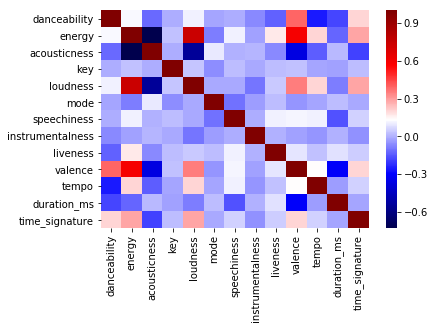

In [167]:
import seaborn as sns
sns.heatmap(country_audio_features.corr(),cmap='seismic')

Most features appear to be negatively correlated with eachother.

We can convert these features to arrays and use nearest neighbors to perform similar tasks as before to find songs with the closest audio features to eachother.

In [168]:
country_audio_array = np.array(country_audio_features)

In [170]:
# Reshape with 13 dimensions
country_NN_audio = NN.fit(country_audio_array)
audio_vec_cT = []
for vec in country_audio_array:
    new_vec = vec.reshape(1,13)
    audio_vec_cT.append(new_vec)

In [172]:
closest_country_audio = []
for vec in audio_vec_cT:
    close_10 = country_NN_audio.kneighbors(X=vec,n_neighbors=10)[1]
    closest_country_audio.append(close_10)

Very similar to the function before, but the song will map to the audio features list instead of the lyrics list.

In [225]:
def similar_country_audio(artist,song):
    neighbors_lyrics=[]
    neighbors = []
    
    lyrics = PyLyrics.getLyrics(artist,song)
    clean_lyrics = lyrics.replace('\n',' ')
    
    position = country_songs.index(clean_lyrics)
   
    for song in closest_country_audio[position]:
        for index in song:
            if index != position:
                neighbors_lyrics.append(country_songs[index])
    
    for dicts in country_lyrics:
        for key,val in dicts.items():
            for i in neighbors_lyrics:
                if val == i:
                    neighbors.append(dicts['Artist'] + ' : ' + key)
                    neighbors = list(set(neighbors))
    
    return neighbors

We will use the same two songs as before for examples.

In [226]:
similar_country_audio('Keith Urban','Never Comin Down')

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['Hank Williams, Jr. : Queen Of My Heart',
 'Chris LeDoux : Bareback Jack',
 'Miranda Lambert : Ugly Lights',
 'Ashley Monroe : Orphan',
 'JB and The Moonshine Band : Kiss Me That Way',
 'Lonestar : Life as We Know It',
 'Thomas Rhett : Smooth Like The Summer',
 'Kip Moore : Comeback Kid',
 "Jo Dee Messina : My Give A Damn's Busted"]

In [227]:
similar_country_audio('Tim McGraw',"It's Your Love")

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['Eli Young Band : Never Land',
 "Brooks & Dunn : She's Not the Cheatin' Kind",
 'Gretchen Wilson : The Earrings Song',
 'Steve Earle : Local Memory',
 'Hank Williams, Jr. : Keep Your Hands To Yourself',
 'Blake Shelton : When the Wine Wears Off',
 "Steve Miller Band : Tell Me What's The Reason",
 'Carrie Underwood : Undo It',
 'Taylor Swift : Dancing With Our Hands Tied']

If you go back and see similar lyrics, it is clear that songs with closest audio features are different then closest lyrics.  We do not expect them to have any relation.

### Now since we have seperate lists of the closest lyrical and closest audio features, we can combine these together to create an optimal similarity playlist!

The one issue we need to take care of is that the audio list and lyrics are not of the same length.  It is imperative that these two lists are the same length, so we can map each song to the same index of both lists.  

In [183]:
# Convert full dataframe into a list of dictionaries
country_tracks = list(country_audio_df.T.to_dict().values())

In [184]:
len(country_tracks)

4143

In [186]:
len(country_songs)

4223

For simplicity, we will only include songs in the lyric list that are also in the audio list.

In [187]:
# Initialize new list of artist and song of each track in audio list
country_artist_song = []
for dicts in country_tracks:
    c_dict = {}
    c_dict[dicts['Artist']] = dicts['song']
    country_artist_song.append(c_dict)

In [189]:
country_artist_song[:5]

[{'Kelsea Ballerini': 'Graveyard'},
 {'Kelsea Ballerini': 'Miss Me More'},
 {'Kelsea Ballerini': 'Get over Yourself'},
 {'Kelsea Ballerini': 'Roses'},
 {'Kelsea Ballerini': 'Machine Heart'}]

Now we construct a new lyrics list, by looping through each song/artist and retrieving lyrics from the PyLyrics library (This will take some time)

In [193]:
country_new_lyrics = []
for i in country_artist_song:
    for artist,song in i.items():
        lyrics = PyLyrics.getLyrics(artist,song)
        clean_lyrics = lyrics.replace('\n',' ')
        country_new_lyrics.append(clean_lyrics)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Great, now the new lyrics list and audio list should be the same length.

In [195]:
len(country_new_lyrics)

4143

In [196]:
len(country_tracks)

4143

The lyrics and audio features now correspond with eachother.

In [197]:
country_new_lyrics[0]

"I don't wanna be another skeleton in your closet Another rose that you throw, 'cause you know that it ain't okay Just a name on a stone in a row down the road forgotten 'Cause I was falling fast, now I'm just a dash between two dates  I don't wanna be another heart in your graveyard In the cold, hard dirt that you throw down I don't wanna watch you drive away in a black car to a new bar  So you can find another hopeless, broken girl in a little black dress And you take her, break her, lay her heart to rest in peace Right here next to me  Maybe I was naive to believe you would never hurt me But now I know why you hide in your darkest suit and shades? You put on a show, so nobody knows your hands and your shoes are dirty I guess you don't need a shovel to dig a grave  I don't wanna be another heart in your graveyard In the cold, hard dirt that you throw down I don't wanna watch you drive away in a black car to a new bar  So you can find another hopeless, broken girl in a little black dr

In [198]:
country_tracks[0]

{'Artist': 'Kelsea Ballerini',
 'acousticness': 0.195,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ENrvUXtRhkE3yl0xj8fO5',
 'audio_uri': 'spotify:track:6ENrvUXtRhkE3yl0xj8fO5',
 'danceability': 0.542,
 'duration_ms': 226853,
 'energy': 0.748,
 'href': 'https://api.spotify.com/v1/tracks/6ENrvUXtRhkE3yl0xj8fO5',
 'id': '6ENrvUXtRhkE3yl0xj8fO5',
 'instrumentalness': 3.57e-06,
 'key': 8,
 'liveness': 0.102,
 'loudness': -6.688,
 'mode': 1,
 'song': 'Graveyard',
 'speechiness': 0.0593,
 'tempo': 87.982,
 'time_signature': 4,
 'types': 'audio_features',
 'valence': 0.409}

The last steps consist of combining the lyrics and audio features, and creating a playlist equally weighting both.

In [216]:
# Combine lyrical and audio arrays
total_array = np.concatenate((new_country_array,country_audio_array),axis=1)

It is very import to standardize these arrays, in order to have similar spacial distances between the arrays and limited bias.

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
total_array_scaled = scaler.fit_transform(total_array)

In [221]:
total_array_scaled.shape

(4143, 113)

In [218]:
total_array_scaled[0]

array([ 8.05976851e-01, -2.97591955e-01, -1.04048144e+00, -7.01637302e-01,
        9.90813086e-01, -3.19338277e-01, -2.14253094e+00,  2.60309482e-02,
       -9.46502260e-01, -4.89307430e-01, -6.69297366e-01, -1.23671040e-01,
       -8.16122432e-01, -5.14828806e-01,  2.01733836e-03, -4.49979458e-01,
        6.86378741e-01, -8.45576821e-01,  3.74301851e-01,  6.41540032e-01,
       -3.20350782e-01,  4.40138801e-01,  2.69142043e-01,  6.89334815e-01,
       -5.92988826e-01, -7.47243182e-02,  1.68462815e-01,  1.13352246e+00,
        1.20996160e+00, -4.34331408e-01, -7.96587086e-01, -2.36877591e-01,
        1.34769510e+00,  6.81989897e-01, -2.29803182e-01, -1.00887425e+00,
       -1.49076185e+00,  5.83139004e-01, -9.00738185e-01,  2.18603869e+00,
        2.34249644e-01,  1.19928707e+00,  1.24229185e-01, -1.27023622e+00,
       -6.64033937e-01, -1.55699178e-01, -1.90751702e-01,  7.74910945e-01,
       -1.55146669e+00,  1.80734574e+00,  5.20383202e-01, -8.65638492e-01,
        1.22120448e+00,  

In [219]:
#Fitting Nearest neighbors on the combined array
NN_total= NN.fit(total_array_scaled)

In [222]:
#Reshaping the vecs to 113 dimensions (100 + 13) to fit in model
vec_total_T = []
for vec in total_array_scaled:
    new_vec = vec.reshape(1,113)
    vec_total_T.append(new_vec)

In [223]:
# Construct list of closest lyrical and audio features
closest_both = []
for vec in vec_total_T:
    close_10 = NN_total.kneighbors(X=vec,n_neighbors=11)[1]
    closest_both.append(close_10)

### Create optimal playlists!

In [239]:
def similar_both(artist,song):
    neighbors_lyrics=[]
    neighbors = []
    
    lyrics = PyLyrics.getLyrics(artist,song)
    clean_lyrics = lyrics.replace('\n',' ')
    
    position = country_new_lyrics.index(clean_lyrics)
   
    for song in closest_both[position]:
        for index in song:
            if index != position:
                neighbors_lyrics.append(country_new_lyrics[index])
    
    for dicts in country_lyrics:
        for key,val in dicts.items():
            for i in neighbors_lyrics:
                if val == i:
                    neighbors.append(dicts['Artist'] + ' : ' + key)
                    neighbors = list(set(neighbors))
        
    print('Here is your playlist!' + '\n')
    
    for neighbor in neighbors:
        print(neighbor)

In [240]:
similar_both('Keith Urban','Never Comin Down')

Here is your playlist!

Zac Brown Band : Jump Right In
Jerrod Niemann : Day Drinkin'
Keith Urban : Drop Top
Brett Eldredge : Crystal Clear
Julie Roberts : NASCAR Party
Keith Anderson : Stick It
Chuck Wicks : Salt Life
Florida Georgia Line : Summerland
Jon Pardi : California Sunrise
Blake Shelton : Some Beach


/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [230]:
similar_both('Tim McGraw',"It's Your Love")

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['Carolyn Dawn Johnson : Love Rules',
 'Keith Anderson : Lazy With Your Love',
 'Kelly Clarkson : Love So Soft',
 'Ricky Skaggs : Hold On Tight (Let It Go)',
 "Trisha Yearwood : I'll Still Love You More",
 "Gretchen Wilson : I'd Love to Be Your Last",
 "Steve Miller Band : Tell Me What's The Reason",
 'Alan Jackson : O How I Love Jesus',
 "Trent Willmon : I'll Love You Anyway",
 'Jo Dee Messina : Because You Love Me']

And there it is! If you look back at other similarities to these songs, you can see that there are no overlaps, which is great.  Now that we have three different types of playlists, we can do one last thing and combine it into one large function.

### Pick your playlist!

In [241]:
def get_playlists(artist,song):
    
    neighbors_lyrics=[]
    neighbors = []
    
    neighbors_audio = []
    neighbors1 = []
    
    neighbors_both = []
    neighbors2= []

    lyrics = PyLyrics.getLyrics(artist,song)
    clean_lyrics = lyrics.replace('\n',' ')

    position = country_new_lyrics.index(clean_lyrics)

    for song in closest_country_lyrics[position]:
        for index in song:
            if index != position:
                neighbors_lyrics.append(country_new_lyrics[index])

    for song in closest_country_audio[position]:
        for index in song:
            if index != position:
                neighbors_audio.append(country_new_lyrics[index])

    for song in closest_both[position]:
        for index in song:
            if index != position:
                neighbors_both.append(country_new_lyrics[index])

    for dicts in country_lyrics:
        for key,val in dicts.items():
            for i in neighbors_lyrics:
                if val == i:
                    neighbors.append(dicts['Artist'] + ' : ' + key)
                    neighbors = list(set(neighbors))

    for dicts in country_lyrics:
        for key,val in dicts.items():
            for i in neighbors_audio:
                if val == i:
                    neighbors1.append(dicts['Artist'] + ' : ' + key)
                    neighbors1 = list(set(neighbors1))

    for dicts in country_lyrics:
        for key,val in dicts.items():
            for i in neighbors_both:
                if val == i:
                    neighbors2.append(dicts['Artist'] + ' : ' + key)
                    neighbors2 = list(set(neighbors2))

    print('Lyrical playlist:' + '\n')
    
    for neighbor in neighbors:
        print(neighbor)
    
    print('\n')
    
    print('Audio playlist:' + '\n')
    
    for neighbor in neighbors1:
        print(neighbor)
    
    print('\n')
    
    print('Combined playlist:' + '\n')
    
    for neighbor in neighbors2:
        print(neighbor)

This function should print out three unique playlists.

In [246]:
get_playlists('Keith Urban','Never Comin Down')

Lyrical playlist:

Josh Gracin : Over Me
The Lost Trailers : I'm A Country Man
Ashton Shepherd : Regular Joe
Sheryl Crow : Woo Woo
Jewel : Nicotine Love
Cross Canadian Ragweed : Soul Agent
Kenny Rogers : Winter Wonderland
Chris Young : What If I Stay
Dierks Bentley : Goodbye In Telluride
Brantley Gilbert : It's About To Get Dirty


Audio playlist:

Vince Gill : Make You Feel Real Good
George Strait : Goin' Goin' Gone
Darryl Worley : Living In The Here And Now
Carolyn Dawn Johnson : Teach Me
Keith Urban : Red Camaro
LOCASH : I Know Somebody
The Band Perry : Don’t Let Me Be Lonely
Sia : Santa's Coming For Us
Steve Azar : You're My Life


Combined playlist:

Zac Brown Band : Jump Right In
Jerrod Niemann : Day Drinkin'
Keith Urban : Drop Top
Brett Eldredge : Crystal Clear
Julie Roberts : NASCAR Party
Keith Anderson : Stick It
Chuck Wicks : Salt Life
Florida Georgia Line : Summerland
Jon Pardi : California Sunrise
Blake Shelton : Some Beach


/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/peyjmonahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


### Awesome. So, at the end we just had to input one song and it will spit out three different playlists of similarities.

### That is all I have for playlist generators.  If you have any suggestions or improvements feel free to message me.  I will be installing this generator into a Flask Web application shortly.

### Things to note: I performed these same steps across four major genres, but it was not included to avoid repetition.  There are also some minor pieces of code that were not included to improve readability and reduce redudancy.

### Thanks for following along!